# Simple
Start simple

- 1 stock
- forget about weekends
- 1st try only Close, then use Close and combined stars

#### Resources

* ARIMA extensive tutorial: https://www.analyticsvidhya.com/blog/2021/07/stock-market-forecasting-using-time-series-analysis-with-arima-model/
* Multivariate: https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/
* MLForecast: https://forecastegy.com/posts/multiple-time-series-forecasting-with-scikit-learn/


* https://avestia.com/ICSTA2021_Proceedings/files/paper/ICSTA_132.pdf

In [1]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster

In [3]:
import pandas as pd
import os

In [1006]:
stocks = {}
for file in os.listdir("stocks"):
    if file.endswith(".parquet"):
        stock_name = file.rstrip(".parquet")
        df = pd.read_parquet(f"stocks/{file}").set_index("date").asfreq("D")
        stocks[stock_name] = df

In [178]:
def max_star(df, columns = ['star1', 'star2', 'star3', 'star4', 'star5']):
    return df.apply(lambda r : columns[r[columns].values.argmax()], axis = 1)

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster


In [553]:
import seaborn as sns

In [586]:
days = 7
returns = np.log(df.Close).diff(days)

df["returns"] = returns

<AxesSubplot:xlabel='max_star_rating', ylabel='returns'>

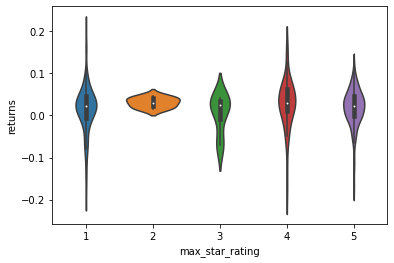

In [588]:
sns.violinplot(data = df, x = "max_star_rating", y = "returns")

In [308]:
def _exponential_smooth(data, alpha):
    """
    Function that exponentially smooths dataset so values are less 'rigid'
    :param alpha: weight factor to weight recent values more
    """
    
    return data.ewm(alpha=alpha).mean()



In [1010]:
df = stocks["AAPL"]
#df = df.dropna().copy()
df = df.ffill().bfill()

max_star_df = max_star(df)
df["max_star_rating"] = max_star_df.apply(lambda x : int(x[-1]))

threshold = '2020-07-30 23:59:00'

train_df, test_df = train_test_split(df, train_pctg = 0.85)

In [1021]:
exog_cols = ['star1', 'star2', 'star3', 'star4', 'star5']
exog_cols = ['tails_median_score']

#exog_cols = ["max_star_rating"]
#exog_cols = ['max_star_rating']
target_col = "Close"

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2241.096, Time=0.47 sec
First viable model found (2241.096)
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2246.835, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2235.967, Time=0.03 sec
New best model found (2235.967 < 2241.096)
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2235.690, Time=0.03 sec
New best model found (2235.690 < 2235.967)
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2248.724, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2237.690, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2237.690, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2238.673, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2239.090, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.145 seconds
Test error (rmse): 2.138076856791901
Exog cols : ['tails_median_score']


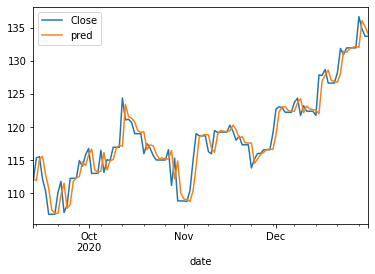

In [1022]:
forecaster = fit_arima_model(train_df, exog_cols = exog_cols)
pred_df = predict_arima_ahead_update(forecaster, test_df, exog_cols = exog_cols)
compute_test_error(pred_df, y_true_col=target_col, exog_cols = exog_cols)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2240.790, Time=0.34 sec
First viable model found (2240.790)
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2248.265, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2236.412, Time=0.03 sec
New best model found (2236.412 < 2240.790)
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2236.196, Time=0.03 sec
New best model found (2236.196 < 2236.412)
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2250.134, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2238.192, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2238.192, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2239.133, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2239.636, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.731 seconds
Test error (rmse): 2.137199975395724


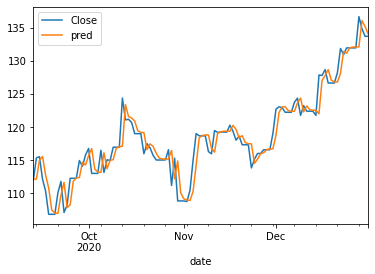

In [1023]:
forecaster_simple = fit_arima_model(train_df, target_col=target_col, exog_cols = None)
pred_df = predict_arima_ahead_update(forecaster_simple, test_df, target_col, exog_cols = None)
compute_test_error(pred_df, y_true_col=target_col)

In [634]:
forecaster_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  504
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1026.638
Date:                Fri, 21 Apr 2023   AIC                           2065.276
Time:                        13:04:13   BIC                           2090.600
Sample:                             0   HQIC                          2075.211
                                - 504                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7186      0.314      2.290      0.022       0.103       1.334
ar.L1         -1.8399      0.022    -83.133      0.000      -1.883      -1.797
ar.L2         -0.9648      0.022    -44.668      0.000      -1.007      -0.922
ma.L1          1.8032      0.033     54.521      0.000       1.738       1.868
ma.L2          0.9103      0.032     28.062      0.000       0.847       0.974
sigma2         3.4667      0.119     29.205      0.000       3.234       3.699
===================================================================================
Ljung-Box (L1) (Q):                   3.65   Jarque-Bera (JB):               748.04
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               9.40   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [636]:
pm.acf(df.Close)

array([1.        , 0.99103821, 0.98233058, 0.97313793, 0.96477174,
       0.95670719, 0.94820768, 0.94072713, 0.93290354, 0.92520267,
       0.91699733, 0.90906306, 0.90213904, 0.8950663 , 0.8879125 ,
       0.88058132, 0.87312514, 0.86572794, 0.85862907, 0.85063491,
       0.84288455, 0.8354449 , 0.82829022, 0.82203603, 0.8157506 ,
       0.81025633, 0.80462253, 0.79920157])

In [595]:
decomposed = pm.arima.decompose(df.reset_index().Close, 'multiplicative', m = 30)

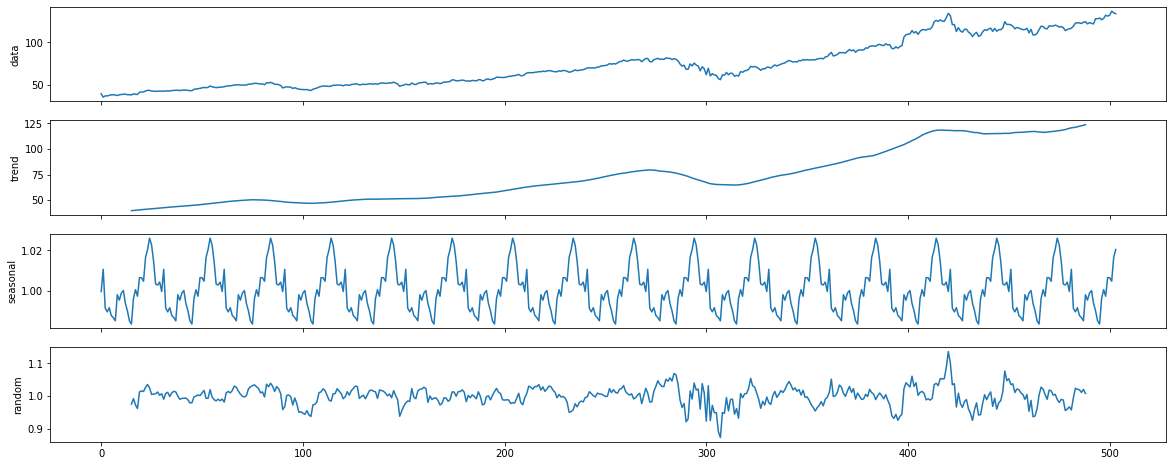

In [596]:
axes = pm.utils.decomposed_plot(decomposed, figure_kwargs= {'figsize': (20, 8)},
                             show=False)

In [802]:
#from google.cloud import bigquery
#bq_client = bigquery.Client()
#
#titles_tables = []
#for table in bq_client.list_tables("headlines"):
#    if table.table_id.endswith("_stars"):
#        titles_tables.append(table) 
#    
#
#for table in titles_tables:
#    df = bq_client.query(f"SELECT * FROM `{table.dataset_id}.{table.table_id}`").result().to_dataframe()
#    df.to_parquet(f"news/{table.table_id}.parquet")


df = pd.read_parquet("news/AAPL_stars.parquet") 

In [950]:
def compute_combined_score(ticker):
    df = (pd.read_parquet(f"news/{ticker}_stars.parquet") 
            .drop_duplicates("title")
         )
    star_cols = ['star1', 'star2', 'star3', 'star4', 'star5']
    X = df[star_cols].values
    c = np.arange(5) + 1
    df["combined_score"] = np.dot(X,c)
    return df




def get_quantiles(series, quantiles): 
    q = np.quantile(df.combined_score, [0.3, 0.8])
    print(ticker,q)
    array = df.combined_score.values.tolist()
    return {ticker : array}
    
    return {"value" : array, "ticker" : [ticker]*len(array)}

In [956]:
combined_scores = {}
for stock in stocks:
    combined_scores[stock] = compute_combined_score(stock)

quantiles = []
for k, df in combined_scores.items():
    qmin,qmax = np.quantile(df.combined_score, [0.25, 0.75])
    quantiles.append({"stock" : k, "qmin" : qmin, "qmax" : qmax})

quantiles_df = pd.DataFrame(quantiles)
quantiles_df.style.background_gradient()

,stock,qmin,qmax
0,AAPL,2.311668,4.034992
1,OXY,2.142794,3.857227
2,GS,2.117521,3.625601
3,MCD,2.099061,3.926730
4,MSFT,2.379365,4.042303
5,KHC,2.632419,4.123197
6,PEP,2.717955,4.108694


In [957]:
q1, q3 = quantiles_df.qmin.max(), quantiles_df.qmax.min()

In [803]:
df.drop_duplicates("title", inplace = True)

In [804]:
import seaborn as sns

In [805]:
star_cols = ['star1', 'star2', 'star3', 'star4', 'star5']

In [806]:
stars_unpivoted_df = (df
                      .melt(value_vars = star_cols, id_vars = "title")
                      .rename(columns = {"variable" : "star"})
                     )

In [807]:
X = df[star_cols].values
c = np.arange(5) + 1
df["combined_score"] = np.dot(X,c)

<AxesSubplot:xlabel='combined_score', ylabel='Count'>

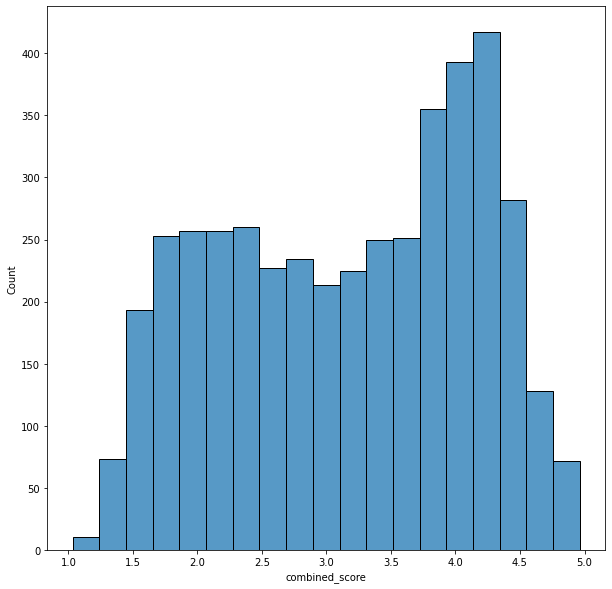

In [808]:
fig, ax = plt.subplots(figsize = (10,10))
sns.histplot(data = df, x = "combined_score")

In [996]:
for ticker, df in combined_scores.items():
    q1, q3 = np.quantile(df.combined_score, [0.25, 0.75])
    df_filtered = df.query(f"combined_score < {q1} | combined_score > {q3}")
    tails_median_score = df_filtered.groupby("date_google")["combined_score"].median()
    tails_median_score.index = tails_median_score.index.tz_localize(None)
    tails_median_score.name = "tails_median_score"
    
    tails_mean_score = df_filtered.groupby("date_google")["combined_score"].mean()
    tails_mean_score.index = tails_mean_score.index.tz_localize(None)
    tails_mean_score.name = "tails_mean_score"
    
    stock_df = stocks[ticker]
    stock_df = pd.merge(stock_df, tails_median_score, right_index=True, left_index=True, how = "left")
    stock_df = pd.merge(stock_df, tails_mean_score, right_index=True, left_index=True, how = "left")
    stock_df.reset_index().to_parquet(f"stocks/{ticker}.parquet")
    print(ticker, stock_df.tails_median_score.isna().sum() / len(stock_df))

AAPL 0.0533515731874145
OXY 0.25444596443228457
GS 0.1094391244870041
MCD 0.057455540355677154
MSFT 0.06703146374829001
KHC 0.15047879616963064
PEP 0.06155950752393981


In [1003]:
for ticker, stock_df in stocks.items():
    stock_df.to_parquet(f"stocks/{ticker}.parquet")

In [1206]:
stock_df = stocks[ticker]

In [1148]:
S = stock_df.bfill().ffill().dropna()
diff_df = S.diff(1).dropna()

In [1187]:
stocks.keys()

dict_keys(['AAPL', 'OXY', 'GS', 'MCD', 'MSFT', 'KHC', 'PEP'])

In [1269]:
ticker = "KHC"
df = stocks[ticker][["Close", "tails_median_score"]].copy()



In [1287]:
def best_sentiment_score_lags(df, ticker, num_lags = 30, corr_threshold = 0.1):
    df = df.copy()
    for i in range(0,num_lags):
        df[f"tails_score_lag_{i}"] = df.tails_median_score.shift(i)
    tails_lag_corr = df.corr()[["Close"]].iloc[3:]
    
    fig, ax = plt.subplots(figsize = (10,5))

    tails_lag_corr.plot(ax = ax, title = f"Cross correlation with lagged tails sentiment score: {ticker}")
    plt.xticks(rotation=45)
    plt.show()
    return tails_lag_corr[(tails_lag_corr.abs() > corr_threshold).values]
    
    


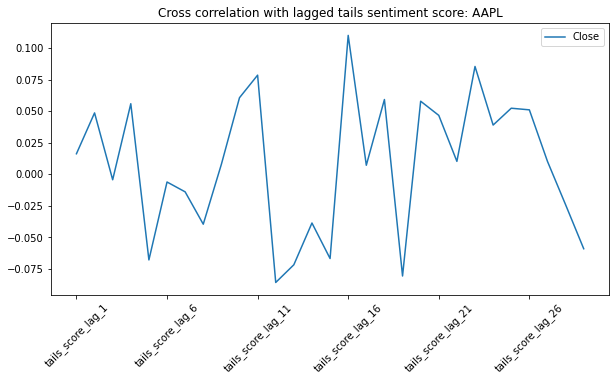

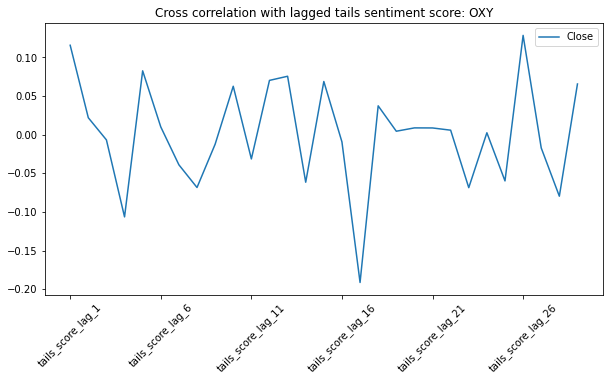

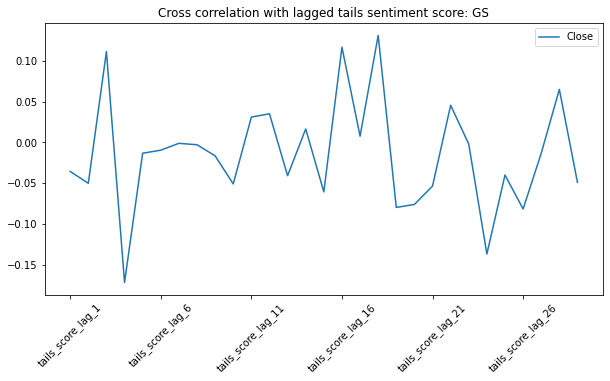

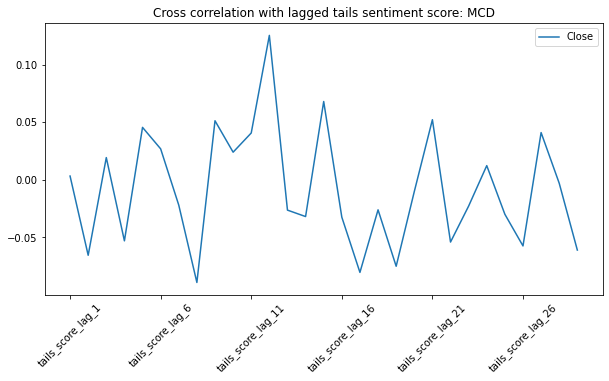

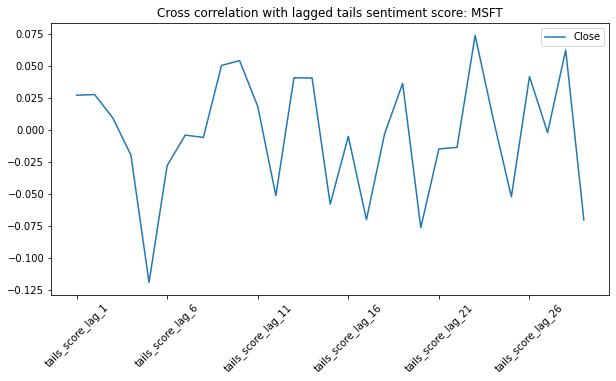

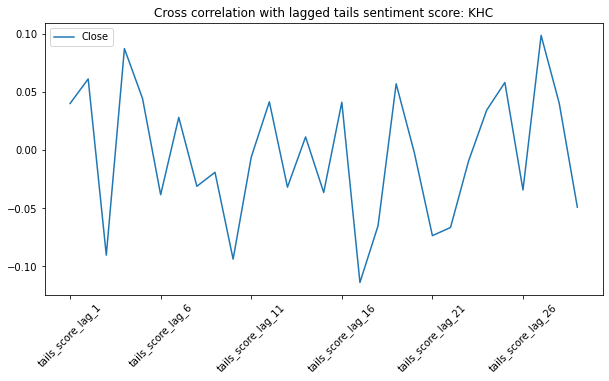

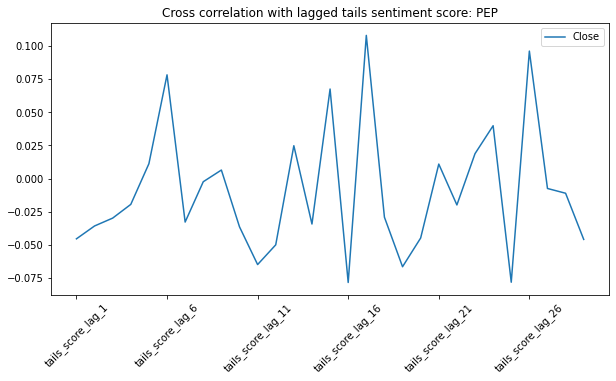

In [1279]:
for ticker in stocks:
    threshold = '2020-07-30 23:59:00'

    df = stocks[ticker][["Close", "tails_median_score"]].copy()
    df.Close = df.Close.diff(1)
    #df.columns = ["Close_diff", "tails_median_score_diff"]
    
    train_df, test_df = train_test_split(df, train_pctg = 0.85)

    tails_lag_corr = best_sentiment_score_lags(train_df, ticker)

In [1101]:
import statsmodels.api as sm


max_lag = 30
sig1 = diff_df.Close
sig2 = S.tails_median_score
corr = np.correlate(sig1, sig2, mode='full')

In [1105]:
corr.argmax()

747

In [1118]:
close = np.arange(10)
score = np.arange(10)
corr = np.convolve(close, score, mode='full')

In [1119]:
for i in range(len(close)):
    close_str = str(close[i:])
    score_str = str(score[:i + 1]).rjust(len(close_str), " ")
    print(close_str)
    print(score_str)
    print(corr[i])

[0 1 2 3 4 5 6 7 8 9]
                  [0]
0
[1 2 3 4 5 6 7 8 9]
              [0 1]
0
[2 3 4 5 6 7 8 9]
          [0 1 2]
1
[3 4 5 6 7 8 9]
      [0 1 2 3]
4
[4 5 6 7 8 9]
  [0 1 2 3 4]
10
[5 6 7 8 9]
[0 1 2 3 4 5]
20
[6 7 8 9]
[0 1 2 3 4 5 6]
35
[7 8 9]
[0 1 2 3 4 5 6 7]
56
[8 9]
[0 1 2 3 4 5 6 7 8]
84
[9]
[0 1 2 3 4 5 6 7 8 9]
120


<AxesSubplot:>

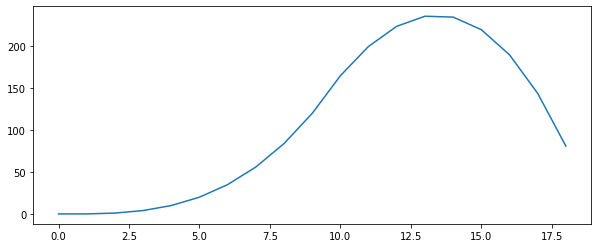

In [1120]:
fig, ax = plt.subplots(figsize = (10,4))
sns.lineplot(y = corr, x = np.arange(len(corr)))

In [ ]:
np.convolve

In [1084]:
len(sig1),len(sig2)

(30, 30)

In [1085]:
corr.max()

0.28715641899507005

<AxesSubplot:>

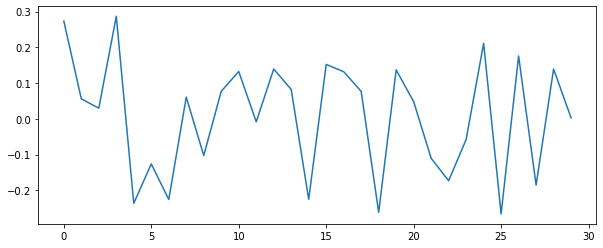

In [1086]:
fig, ax = plt.subplots(figsize = (10,4))
sns.lineplot(y = corr, x = np.arange(len(corr)))

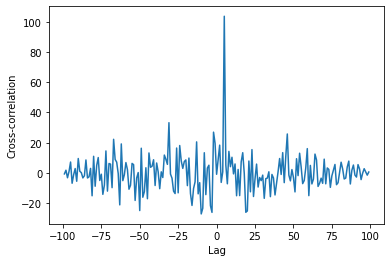

Optimal lag: 5
MSE: 1.141761672687549


In [1087]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(123)
A = np.random.randn(100)
B = np.roll(A, 5) + np.random.randn(100)

# Calculate cross-correlation function
corr = np.correlate(B, A, mode='full')
lags = np.arange(-len(A)+1, len(A))

# Plot cross-correlation function
plt.plot(lags, corr)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.show()

# Find lag value with highest cross-correlation
optimal_lag = lags[np.argmax(corr)]
print('Optimal lag:', optimal_lag)

# Create lagged version of A with optimal lag
lagged_A = np.roll(A, optimal_lag)

# Concatenate A and B into a single DataFrame
df = pd.DataFrame({'A': lagged_A, 'B': B})

# Split data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Train model on training data and evaluate on test data
# (Note: Replace this with your own modeling approach)
from sklearn.linear_model import LinearRegression
X_train = train[['A']]
y_train = train['B']
X_test = test[['A']]
y_test = test['B']
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = np.mean((y_pred - y_test) ** 2)
print('MSE:', mse)


In [1093]:
corr = np.correlate(B, A, mode='valid')

In [ ]:
np.convolve(

In [1089]:
A = np.arange(10)
np.roll(A, 5)

array([5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

<AxesSubplot:xlabel='combined_score', ylabel='Count'>

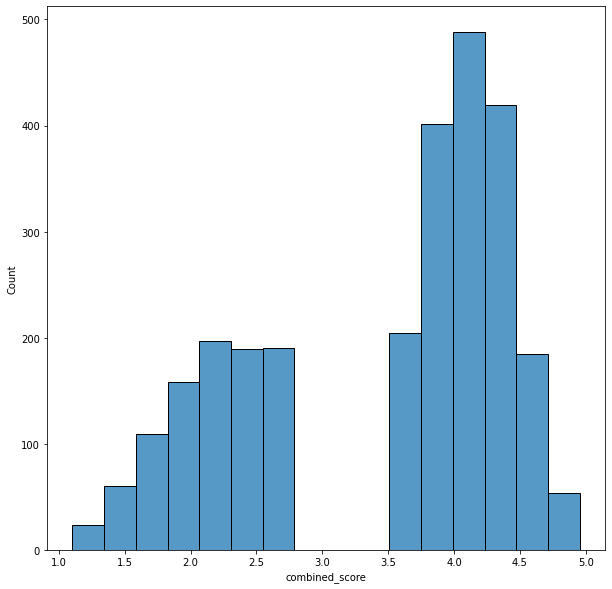

In [959]:
fig, ax = plt.subplots(figsize = (10,10))
sns.histplot(data = df_filtered, x = "combined_score")

<AxesSubplot:xlabel='combined_score', ylabel='Count'>

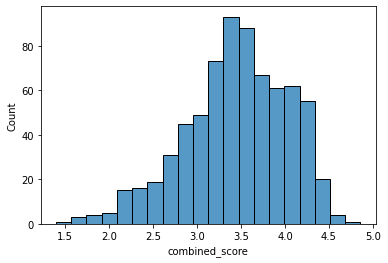

In [968]:
sns.histplot(data = tails_median_score)

In [969]:
stock = stocks["AAPL"]

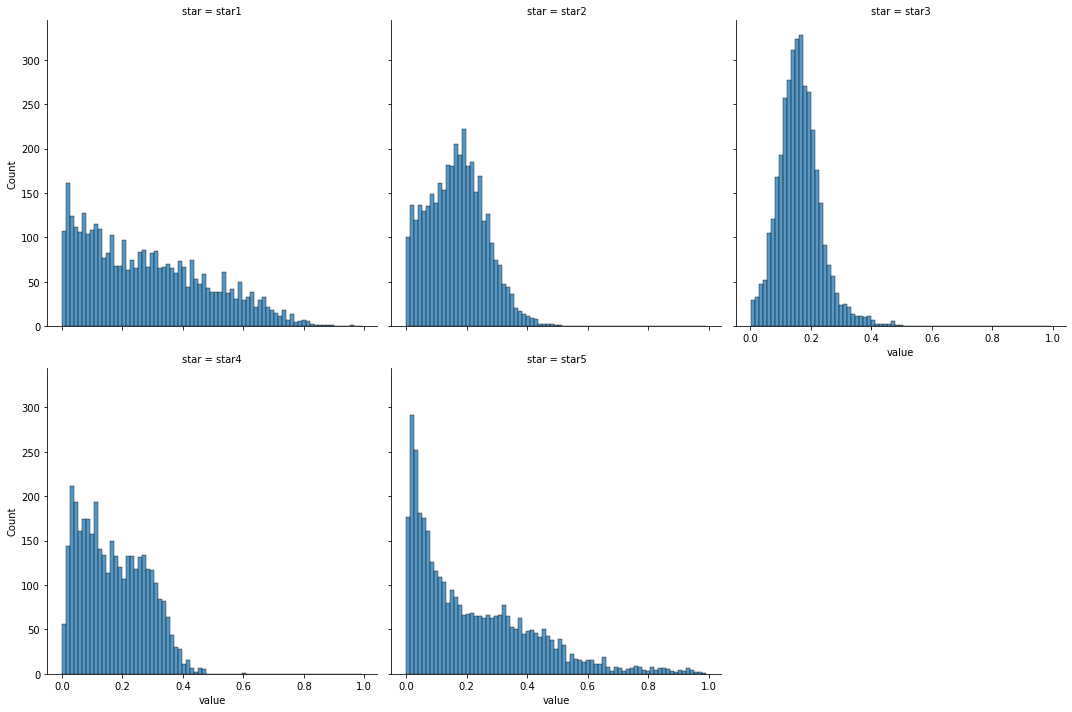

In [736]:
sns.displot(stars_unpivoted_df, x = "value", col = "star", col_wrap = 3, height = 5)


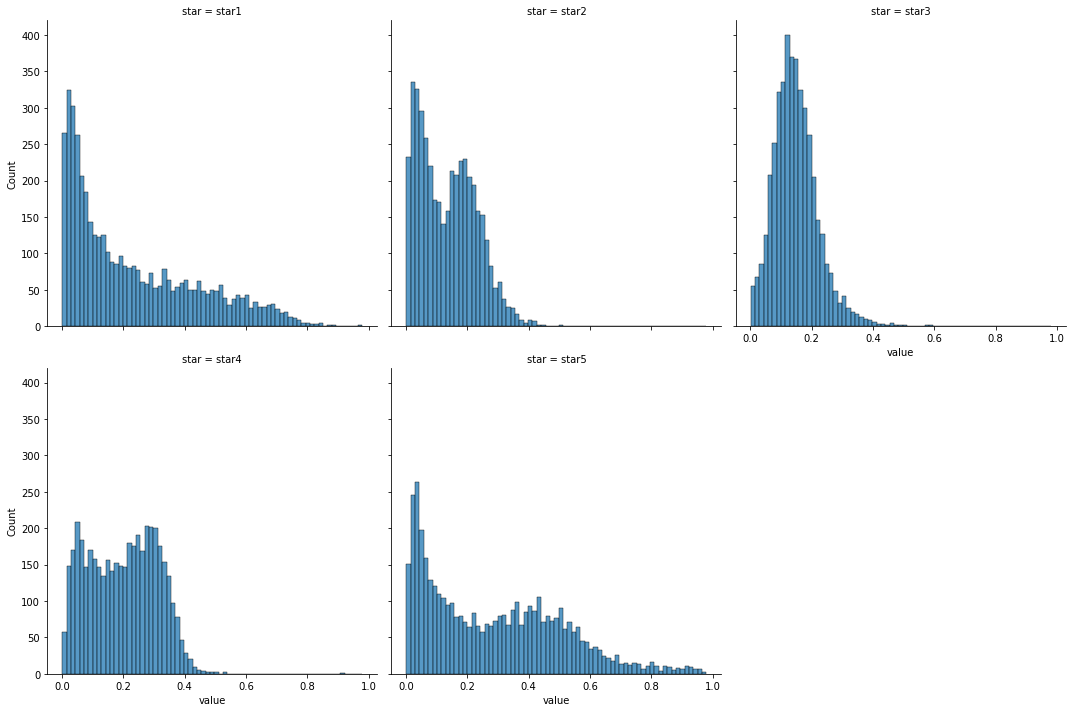

In [728]:
sns.displot(stars_unpivoted_df, x = "value", col = "star", col_wrap = 3, height = 5)


In [730]:
df

,date_google,title,description,url,star1,star2,star3,star4,star5,winner
0,2019-08-04 00:00:00+00:00,"Apple, Google should be ashamed of role in Abs...",Saudi Arabia on Friday ditched a system requir...,https://www.businessinsider.com/apple-google-s...,0.549804,0.229079,0.125400,0.056235,0.039482,star1
1,2019-04-06 00:00:00+00:00,"Scheme to Swap Fake iPhones Adds Up to $900,00...",Two college students in Oregon are accused of ...,https://www.nytimes.com/2019/04/06/business/co...,0.750297,0.134109,0.060788,0.029290,0.025515,star1
2,2020-03-23 00:00:00+00:00,"Facebook, Apple donate masks to coronavirus re...","Tech giants Facebook, Apple and Salesforce hav...",https://nypost.com/2020/03/23/facebook-apple-a...,0.378514,0.157552,0.149025,0.148634,0.166275,star1
3,2019-07-14 00:00:00+00:00,Should Apple make an Apple Books e-ink reader ...,"As someone who loves his Kindle Paperwhite, I'...",https://9to5mac.com/2019/07/14/apple-books-rea...,0.316651,0.210965,0.226453,0.145276,0.100656,star1
4,2020-04-03 00:00:00+00:00,Spending on Apple's App Store Doubled From 201...,Consumers are spending more and more time on t...,https://www.fool.com/investing/2020/04/03/spen...,0.240423,0.218653,0.212911,0.159632,0.168381,star1
...,...,...,...,...,...,...,...,...,...,...
6700,2020-03-25 00:00:00+00:00,Apple will donate 10M face masks to healthcare...,"By way of a working from home Twitter message,...",https://techcrunch.com/2020/03/25/apple-will-d...,0.257877,0.126243,0.128330,0.175594,0.311956,star5
6701,2020-01-24 00:00:00+00:00,Apple introduces its large-scale gym partnersh...,The program would also enforce strong GymKit s...,https://arstechnica.com/gadgets/2020/01/apple-...,0.024010,0.023490,0.070035,0.296554,0.585911,star5
6702,2020-11-15 00:00:00+00:00,"Samsung Galaxy, Apple iPhone & More Cell Phone...",Save on cell phone deals at the early Black Fr...,https://www.globenewswire.com/news-release/202...,0.135443,0.100659,0.162123,0.245171,0.356604,star5
6703,2020-11-12 00:00:00+00:00,"Apple, Google start working on 6G",The first 5G phones from Apple and Google are ...,https://www.lightreading.com/security/apple-go...,0.136700,0.090943,0.130904,0.232698,0.408755,star5


In [38]:
" + ".join(88*"2")

'2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2'

In [6]:
df.filter(regex = "star*").columns

Index(['star1', 'star2', 'star3', 'star4', 'star5'], dtype='object')

In [6]:
c = df.filter(regex = "star*").corr()

In [7]:
c.style.background_gradient()

,star1,star2,star3,star4,star5
star1,1.000000,0.637170,-0.100756,-0.822401,-0.686089
star2,0.637170,1.000000,0.475974,-0.732735,-0.837319
star3,-0.100756,0.475974,1.000000,0.020940,-0.589025
star4,-0.822401,-0.732735,0.020940,1.000000,0.492566
star5,-0.686089,-0.837319,-0.589025,0.492566,1.000000
